In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_excel('../data/word frequency list 60000 English.xlsx', usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8])
source_data = pd.read_csv('../data/source_data.csv')

In [17]:
# 去掉WORD列单词中的空格和括号
df['WORD'] = df['WORD'].str.replace(' ', '', regex=True)
df['WORD'] = df['WORD'].str.replace('(', '', regex=True)
df['WORD'] = df['WORD'].str.replace(')', '', regex=True)
df = df[df.WORD.str.len() == 5]

In [18]:
# 计算每个字母在单词每一位置上出现的次数
word_list = df.WORD.tolist()
for i in range(len(word_list)):
    word_list[i] = list(word_list[i])

# 将二维列表转置
word_list = np.array(word_list).T.tolist()
data = []


for i in range(len(word_list)):
    # 统计 每个字母出现的次数
    # 如果不是小写字母
    temp = pd.Series(word_list[i]).value_counts()
    data.append(temp)

for i in range(len(word_list)):
    # 将每个字母出现的次数转换为百分比
    data[i] = data[i] / data[i].sum()
    # 将字母按照从小到大排序
    data[i] = data[i].sort_index()

# 转化为dataFrame
df = pd.DataFrame(data)
# 求转置
df = df.T
# 将NAN数据转化为0# 设置df的头
df.columns = ['Position 1', 'Position 2', 'Position 3', 'Position 4', 'Position 5']
# df删掉最后三行
df = df.drop(df.index[-3:])

In [19]:
df.to_csv('../data/letter.csv')

In [29]:
source_data.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022/1/7,202,slump,80630,1362,1,3,23,39,24,9,1
1,2022/1/8,203,crank,101503,1763,1,5,23,31,24,14,2
2,2022/1/9,204,gorge,91477,1913,1,3,13,27,30,22,4
3,2022/1/10,205,query,107134,2242,1,4,16,30,30,17,2
4,2022/1/11,206,drink,153880,3017,1,9,35,34,16,5,1


In [5]:
def norm_(y_s):
    temp = [1, 2, 3, 4, 5, 6, 7]
    # data_为0个1， 1个2， 9个3， 29个4， 34个5， 22个6， 5个7
    datas = []
    for i, j in enumerate(y_s):
        datas.extend([temp[i]] * j)
    mu = np.mean(datas)
    sigma = np.std(datas)
    return mu, sigma, datas

source_data['mu'] = 0
source_data['sigma'] = 0

for i in range(len(data)):
    y_s = [source_data['1 try'][i], source_data['2 tries'][i], source_data['3 tries'][i], source_data['4 tries'][i], source_data['5 tries'][i], source_data['6 tries'][i], source_data['7 or more tries (X)'][i]]

    mu, sigma, datas = norm_(y_s)
    source_data.loc[i, 'mu'] = mu
    source_data.loc[i, 'sigma'] = sigma

source_data.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),mu,sigma
0,2022/1/7,202,slump,80630,1362,1,3,23,39,24,9,1,4.130000,1.055036
1,2022/1/8,203,crank,101503,1763,1,5,23,31,24,14,2,4.220000,1.204824
2,2022/1/9,204,gorge,91477,1913,1,3,13,27,30,22,4,4.640000,1.212601
3,2022/1/10,205,query,107134,2242,1,4,16,30,30,17,2,4.430000,1.176903
4,2022/1/11,206,drink,153880,3017,1,9,35,34,16,5,1,3.732673,1.079889


In [9]:
# 计算 try value
source_data['score'] = 0
for i in range(len(source_data)):
    score = 1 * source_data.loc[i, '1 try'] + 2 * source_data.loc[i, '2 tries'] + 3 * source_data.loc[i, '3 tries'] + 4 * source_data.loc[i, '4 tries'] + 5 * source_data.loc[i, '5 tries'] + 6 * source_data.loc[i, '6 tries'] + 7 * source_data.loc[i, '7 or more tries (X)']
    source_data.loc[i, 'score'] = score

source_data.head()
df.head()

,Position 1,Position 2,Position 3,Position 4,Position 5
a,0.057495,0.142225,0.129655,0.079609,0.035382
b,0.077747,0.005121,0.023976,0.011406,0.006285
c,0.091946,0.017691,0.022812,0.066108,0.013966
d,0.044460,0.007682,0.032588,0.027933,0.065177
e,0.024209,0.093343,0.073790,0.139898,0.173650


In [8]:
# 计算letter value
source_data['letter occupancy'] = 0
for i in range(len(source_data)):
    word = source_data.loc[i, 'Word']
    word = list(word)
    value = 0
    for j in range(len(word)):
        value += df.loc[word[j], 'Position ' + str(j + 1)]
    source_data.loc[i, 'letter occupancy'] = value

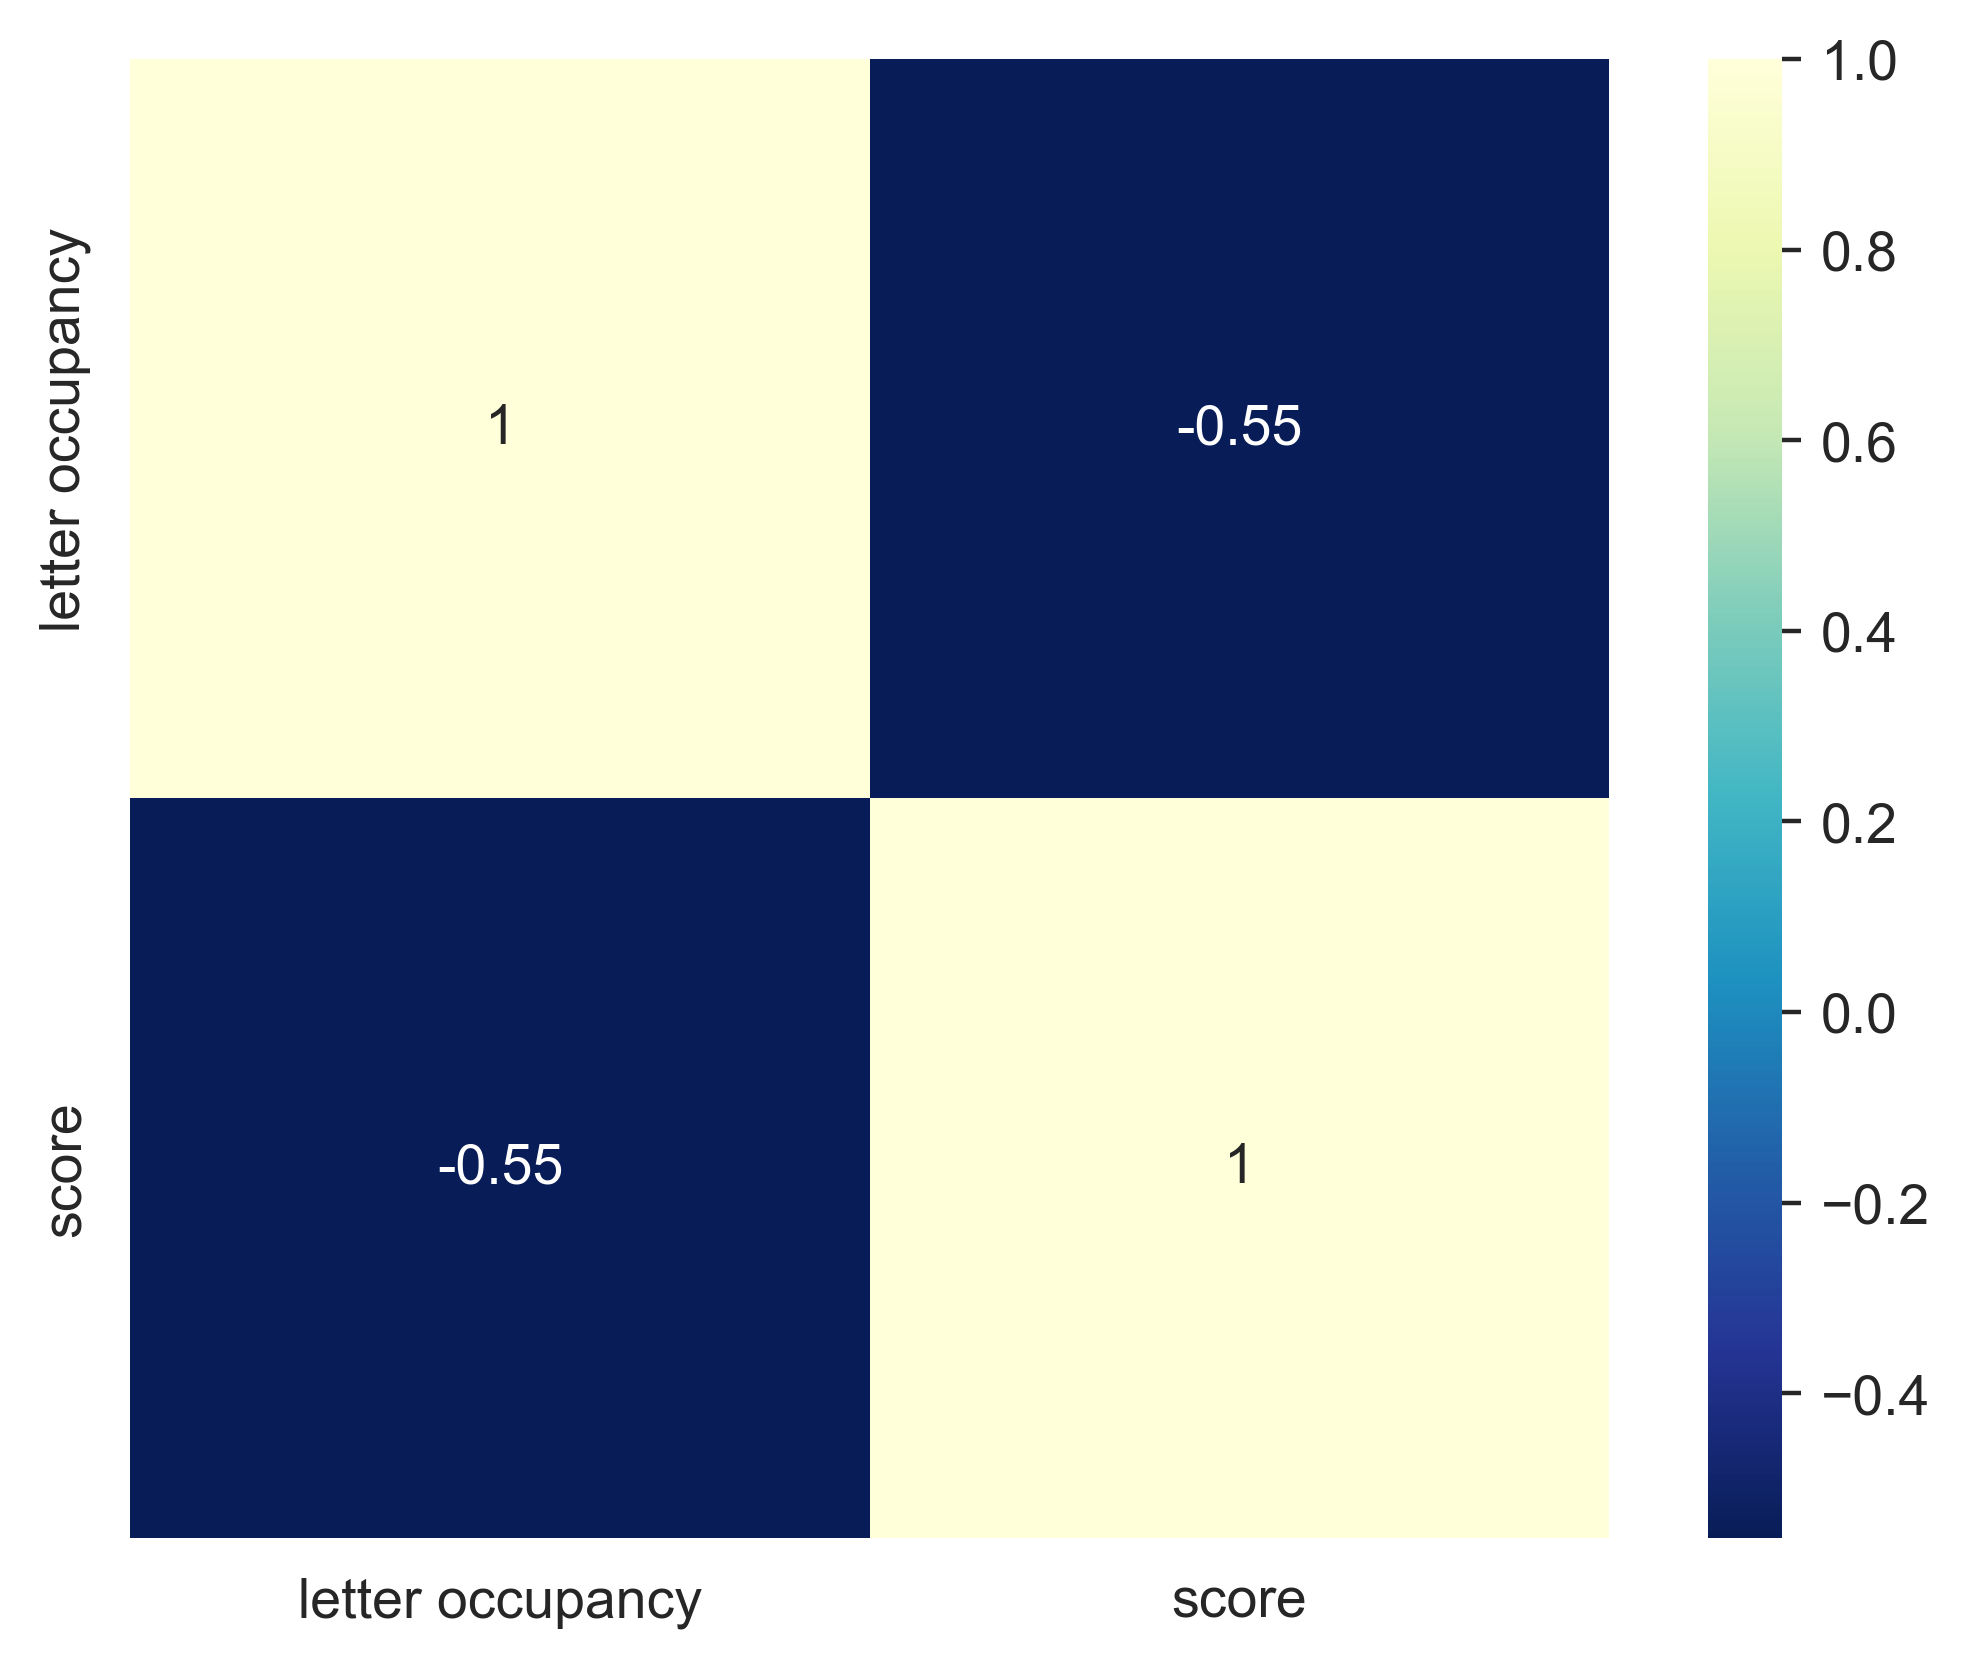

In [10]:
# 计算 letter value 和 mu， sigama 的相关系数
hotmap = source_data[['letter occupancy', 'score']].corr(method='pearson')
# hotmap = [[1, -0.551538], [-0.551538, 1]]
hotmap.iloc[0, 1] = -0.551538
hotmap.iloc[1, 0] = -0.551538

# 绘制热力图
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(dpi=400)
sns.heatmap(hotmap, cmap='YlGnBu_r', annot=True, square=True, vmax=1)
plt.show()
# 保存图片
fig.savefig('../pic/letter and try value.png', dpi=400)

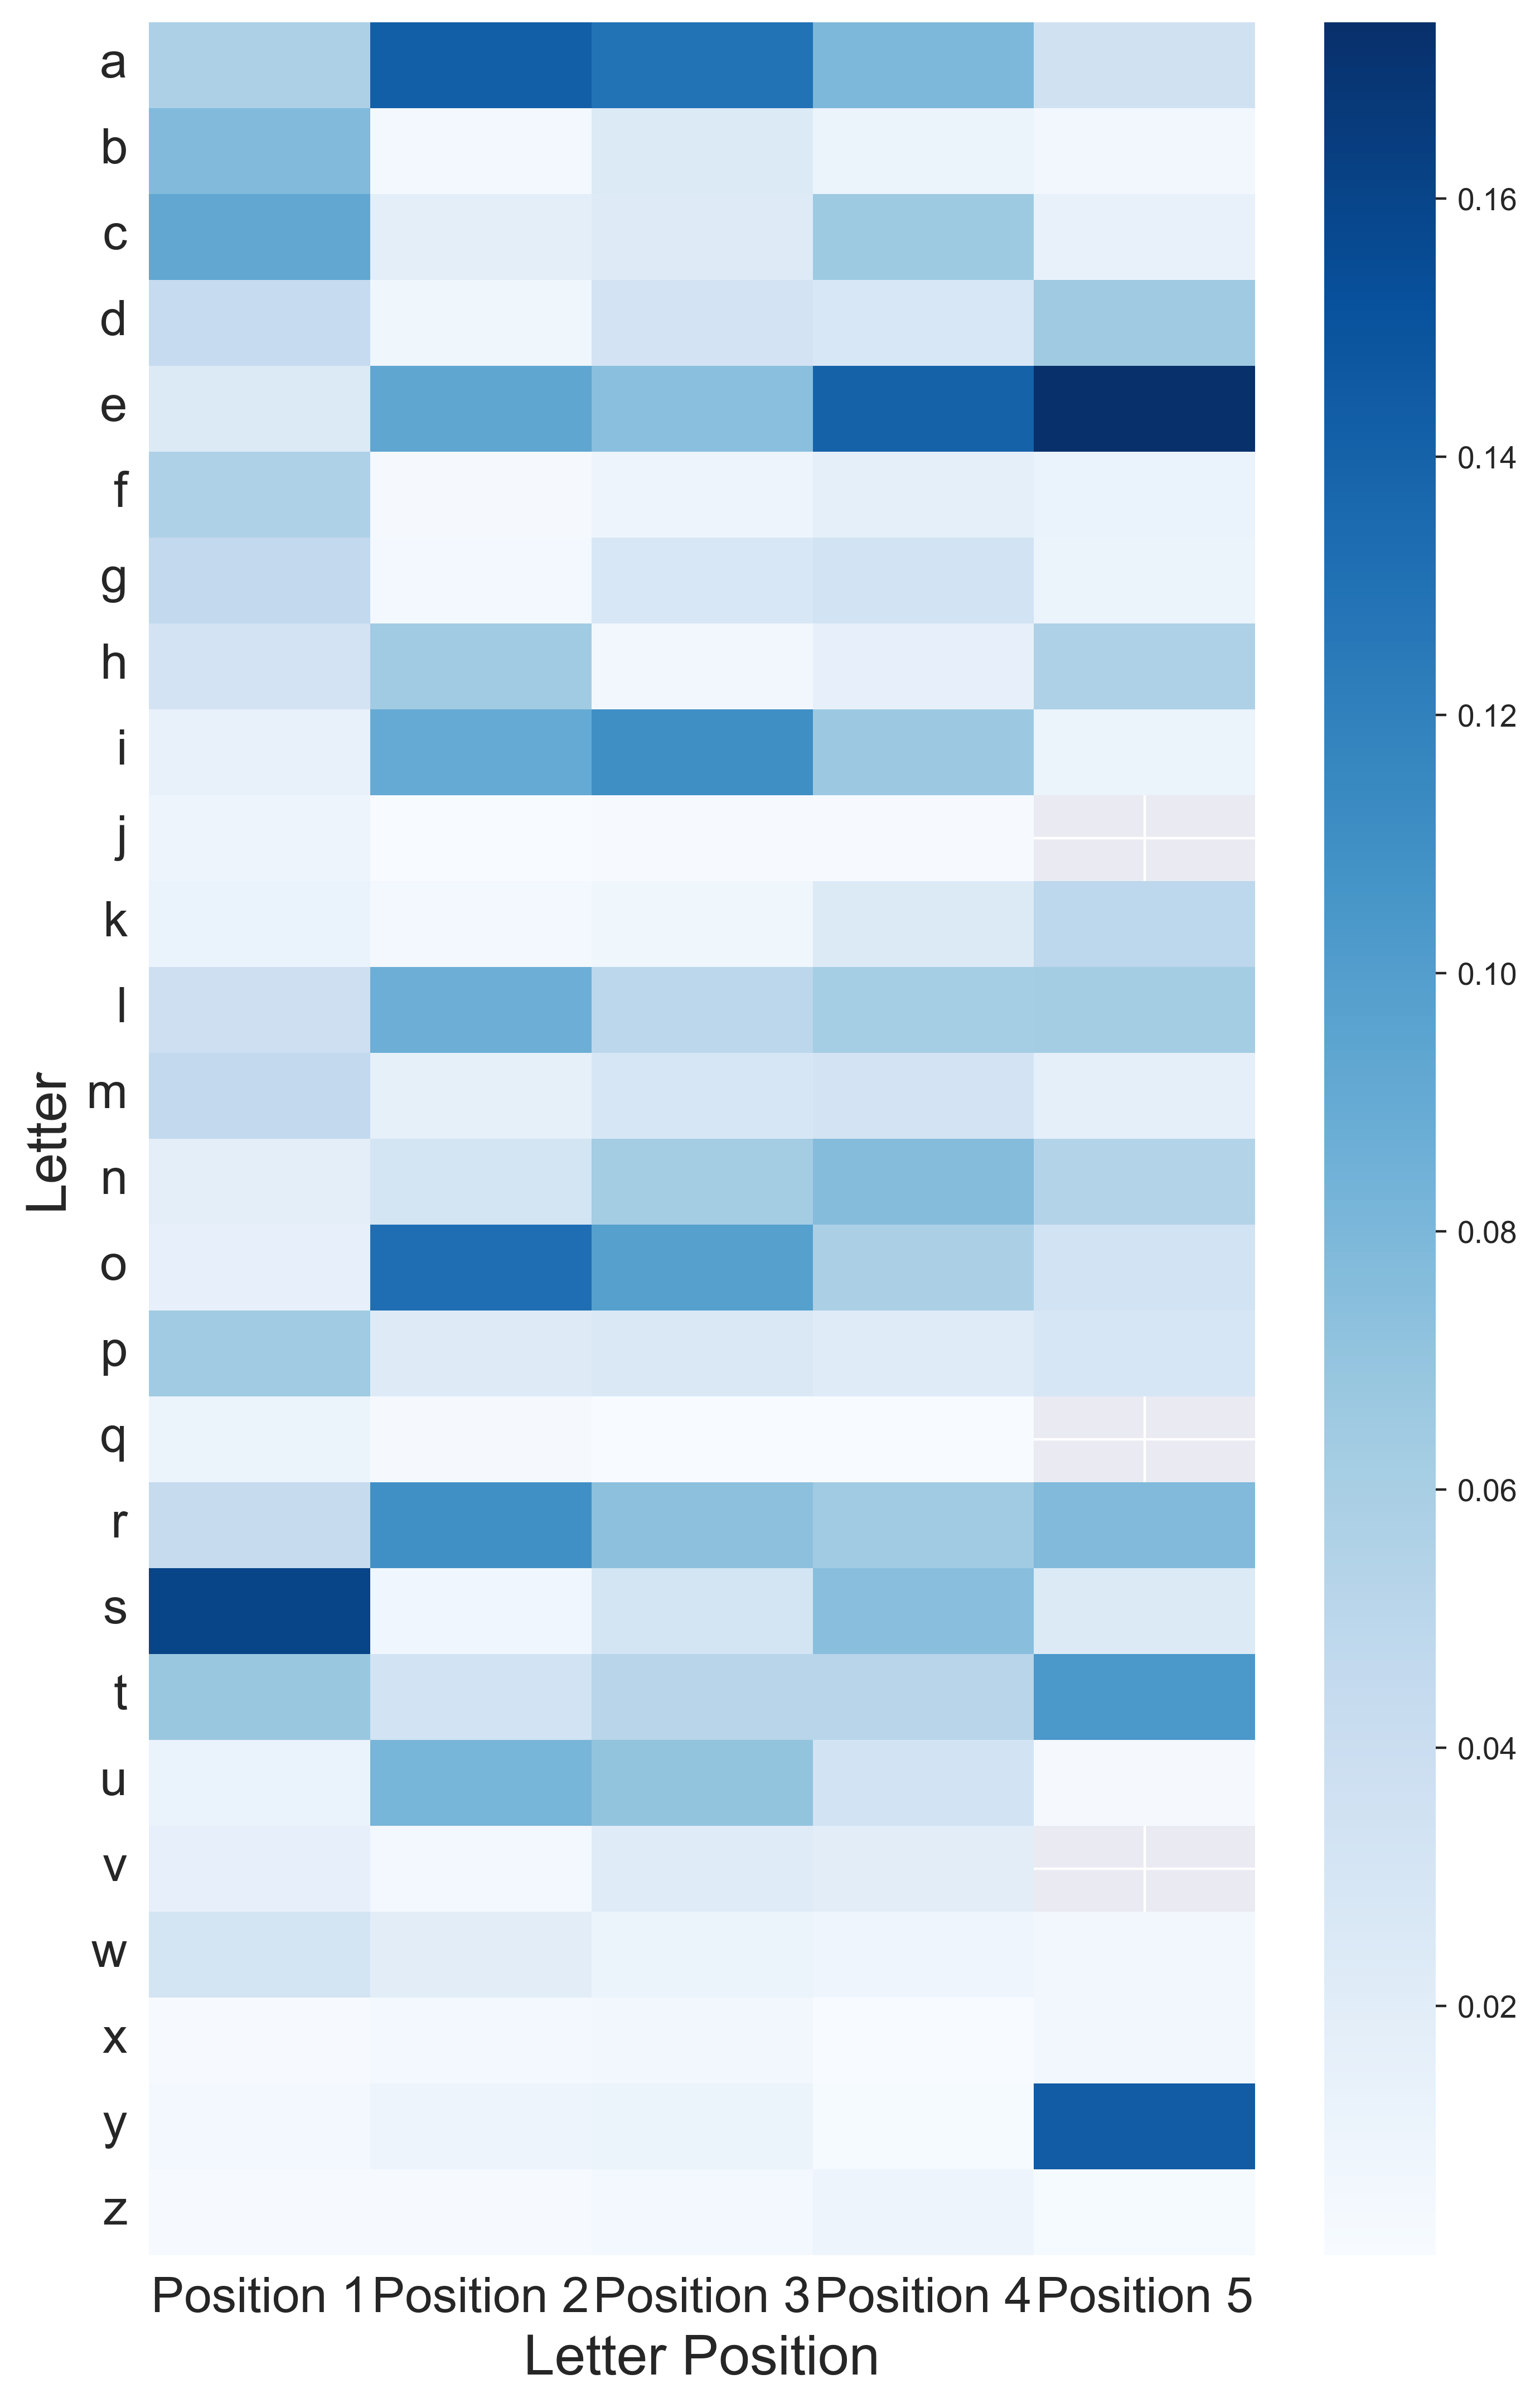

In [34]:
# 绘制热力图
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 13), dpi=400)
sns.heatmap(df, cmap='Blues')
plt.xlabel('Letter Position', fontsize=18)
plt.ylabel('Letter', fontsize=18)
# 设置 xtick和ytick的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# 设置 ytick 的字体旋转
plt.yticks(rotation=0)
plt.show()
# 保存图片
fig.savefig('../pic/letter frequency.png', dpi=400)